# Import libreries

In [2]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt

## Import the mini_data set

In [3]:
# nrows = 3.000.000 
nrows = 3000000
dataset = pd.read_csv('./steam_reviews.csv', header='infer', nrows = nrows)

## Understand the dataset

In [4]:
dataset.columns

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [5]:
dataset.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


# [RQ2] Let's explore the dataset by finding simple insights into the reviews

## [RQ2.1] plot the number of reviews for each application in descending order

I'm creating a dataframeGroupby to store information for each application

In [6]:
app_group = dataset.groupby("app_name")

Counting the number of reviews for each group/application. Than sort in descending order and plot it

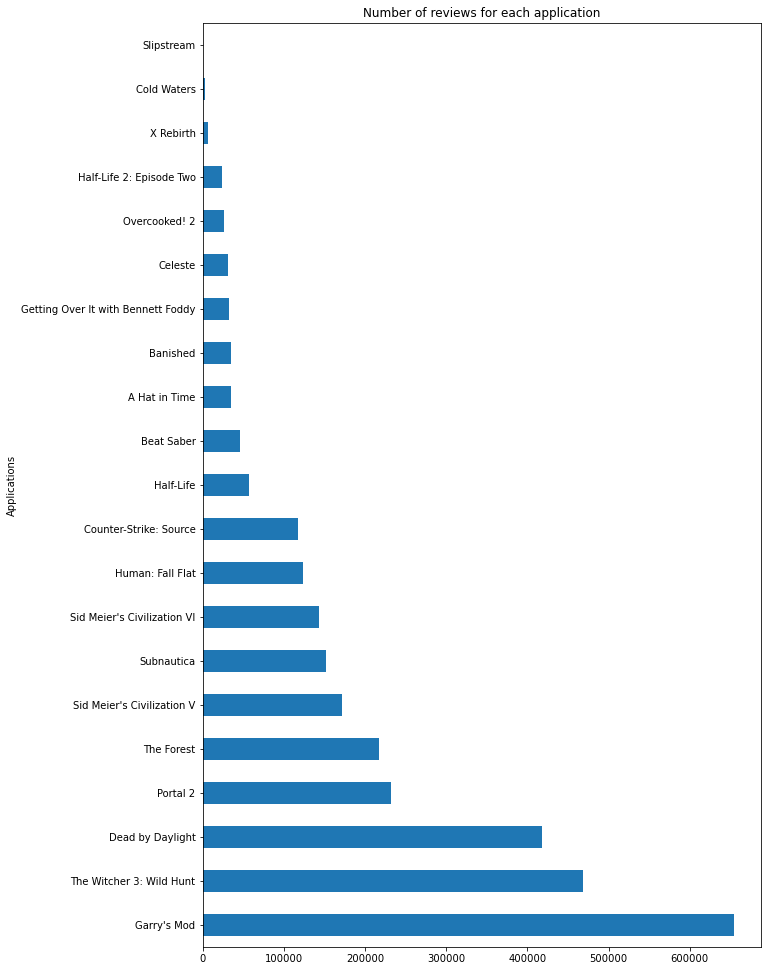

In [7]:
review_appcount = app_group["review"].count().sort_values(ascending=False)

review_appcount.plot(kind = "barh", title = "Number of reviews for each application", xlabel = "Applications",
         ylabel = "Number of reviews", figsize=(10, 17))
plt.show()

## [RQ2.2] What applications have the best Weighted Vote Score?

Compute max of each group and taken the best

Just ouput the 5 best to see if there is some ugual best score

In [8]:
app_group["weighted_vote_score"].max().nlargest(5)

app_name
Subnautica                     0.994453
The Forest                     0.992581
Human: Fall Flat               0.992336
The Witcher 3: Wild Hunt       0.990385
Sid Meier's Civilization VI    0.986126
Name: weighted_vote_score, dtype: float64

The application with the best Weighted Vote Score is: __Subnautica__ with __0.994453__ of score

## [RQ2.3] Which applications have the most and the least recommendations?

"Recommended" is boolean type (True = 1, False = 0). If we sum over each group by recommended value, we can take the most and the least recommendated app

In [9]:
recommended_app = app_group["recommended"].sum().sort_values(ascending=False)
recommended_app.head(1).index[0]

"Garry's Mod"

In [10]:
print("The best recommended app is:\n", recommended_app.head(2),"\n")
print("The least recommended app is:\n", recommended_app.tail(2))

The best recommended app is:
 app_name
Garry's Mod                 632558
The Witcher 3: Wild Hunt    460252
Name: recommended, dtype: int64 

The least recommended app is:
 app_name
Cold Waters    2325
Slipstream      957
Name: recommended, dtype: int64


The best recommended app is __Garry's Mod__.

The least recommended app is __Identity__

## [RQ2.4] How many of these applications were purchased, and how many were given for free?


Purchased and given for free are booleans ( True = 1, False = 0). If we sum over each group by purchase (or received for free) value we can count how many

In [11]:
# getting keys of groupby best and least recommended app
best_app = recommended_app.head(1).index[0]
least_app = recommended_app.tail(1).index[0]

In [12]:
how_many_purchase_bestapp = app_group["steam_purchase"].get_group(best_app).sum()
how_many_free_bestapp = app_group["received_for_free"].get_group(best_app).sum()

In [13]:
how_many_purchase_leastapp = app_group["steam_purchase"].get_group(least_app).sum()
how_many_free_leastapp = app_group["received_for_free"].get_group(least_app).sum()

In [14]:
print("How many were purchased?\n", best_app, ": ",how_many_purchase_bestapp,"\n",least_app, ": ",how_many_purchase_leastapp)
print("\nHow many were given for free?\n", best_app, ": ",how_many_free_bestapp,"\n",least_app, ": ",how_many_free_leastapp)

How many were purchased?
 Garry's Mod :  551250 
 Slipstream :  607

How many were given for free?
 Garry's Mod :  24765 
 Slipstream :  47


In [15]:
df = pd.DataFrame([[how_many_purchase_bestapp,how_many_purchase_leastapp],[how_many_free_bestapp,how_many_free_leastapp]],
                  index = [best_app, least_app],
                  columns = ["Purchase","Given for free"])
df.style

,Purchase,Given for free
Garry's Mod,551250,607
Slipstream,24765,47


# [RQ4] As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

## [RQ4.1] What are the top 3 languages used to review applications?

Each review is writting in one languages, so we groupby language and count the occurencies of the language for each group

In [23]:
n = 3

top_languages = dataset.groupby("language")["language"].count().sort_values(ascending = False)

In [29]:
top3_languages = list(top_languages[:3].index)
print(top3_languages)

['english', 'russian', 'schinese']


The top 3 languages used to review applications are: __english, russian, schinese__

## [RQ4.2] Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages

In [21]:
def filtered_language_reviews(dataset, languages):
    return dataset[dataset.language.isin(languages)]

## [RQ4.3] Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

In [30]:
filtered_dataset = filtered_language_reviews(dataset, top3_languages)

In [33]:
total_cases = filtered_dataset.shape[0]   

In [34]:
fav_cases = filtered_dataset[filtered_dataset["votes_funny"] > 0].shape[0]

In [37]:
percent_funny_reviews = 100*fav_cases/total_cases
print("{:.2f}%".format(percent_funny_reviews))

11.77%


The percentage of reviews wrote with the 3 top langauages voted as funny is: __11.77%__

## [RQ4.4] Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [38]:
fav_cases = filtered_dataset[filtered_dataset["votes_helpful"] > 0].shape[0]

In [39]:
percent_helpful_reviews = 100*fav_cases/total_cases
print("{:.2f}%".format(percent_helpful_reviews))

27.92%


The percentage of reviews wrote with the 3 top langauages voted as funny is: __27.92%__

# [RQ5] The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

## [RQ5.1] Plot the top 10 most popular reviewers and the number of reviews

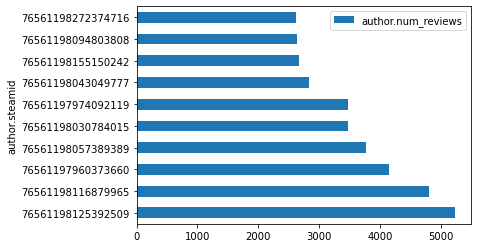

In [45]:
dataset_top10_reviewers = dataset.sort_values(["author.num_reviews"], ascending = False).groupby("author.steamid").head(1)[:10]
dataset_top10_reviewers.plot.barh(x = "author.steamid", y = "author.num_reviews")
plt.show()

## [RQ5.2] What applications did the most popular author review?

We take the steam_id of the top reviewer, than take the dataset of that person

In [74]:
steam_id_top_reviewer = list(dataset_top10_reviewers["author.steamid"].head(1))[0]
#steam_id_top_reviewer

In [78]:
top_reviewer_dataset = dataset[dataset["author.steamid"] == steam_id_top_reviewer].copy()
top_reviewer_dataset

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
504382,504383,70,Half-Life,43084988,english,1337,1530059912,1530059912,True,0,...,False,False,False,76561198125392509,652,5236,20.0,0.0,19.0,1.543585e+09
575674,575675,240,Counter-Strike: Source,42957087,english,1337,1529737601,1529737601,True,4,...,False,False,False,76561198125392509,652,5236,9.0,0.0,8.0,1.566017e+09
656318,656319,420,Half-Life 2: Episode Two,43141276,english,1337,1530226026,1530226026,True,0,...,False,False,False,76561198125392509,652,5236,10.0,0.0,9.0,1.534797e+09
1258197,1258198,4000,Garry's Mod,41015292,english,prophunt is my favourite,1521894336,1521894336,True,5,...,True,False,False,76561198125392509,652,5236,629472.0,12786.0,10961.0,1.611104e+09


In [77]:
app_top_reviewer = top_reviewer_dataset["app_name"]
print(list(app_top_reviewer))

['Half-Life', 'Counter-Strike: Source', 'Half-Life 2: Episode Two', "Garry's Mod"]


## [RQ5.3] How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

Purchase and free is a Bolean so,...

In [85]:
total_cases = top_reviewer_dataset.shape[0] 

In [87]:
number_of_purchase = top_reviewer_dataset["steam_purchase"].sum()
number_of_free = top_reviewer_dataset["received_for_free"].sum()

In [89]:
percent_of_purchase = 100*number_of_purchase/total_cases
percent_of_free = 100*number_of_free/total_cases

## [RQ5.4] How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [ ]:
dff = df[["recommended", "steam_purchase", "received_for_free"]].loc[idx]
dff

In [ ]:
recommended = df["recommended"].loc[idx].values

In [ ]:
n_pur_pos = 0
n_pur_neg = 0
for x,y in zip(steam_purchase_top,recommended):
    if x == True and y == True:
        n_pur_pos +=1
    elif x == True and y == False:
        n_pur_neg +=1
        
print(n_pur_pos)
print(n_pur_neg)

In [ ]:
n_free_pos = 0
n_free_neg = 0
for x,y in zip(received_free_top,recommended):
    if x == True and y == True:
        n_free_pos +=1
    elif x == True and y == False:
        n_free_neg +=1
        
print(n_free_pos)
print(n_free_neg)